## Demontration of Hopfield Networks for information retrieval of distorted images
partly adapted from http://codeaffectionate.blogspot.co.at/2013/05/fun-with-hopfield-and-numpy.html which shows a different version

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""
 
Z = """
XXXXX
...X.
..X..
.X...
XXXXX
"""


X = """
X...X
.X.X.
..X..
.X.X.
X...X
"""

Define functions to plot patterns

In [2]:
def to_pattern(letter):
    return np.array([+1 if c=='X' else -1 for c in letter.replace('\n','')])

In [3]:
import pylab as plt
import numpy as np
def display(patterns):
    from pylab import imshow, cm, show
    plt.subplot(1, 3, 1)
    p0=imshow(patterns[0].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.subplot(1, 3, 2)
    p1=imshow(patterns[1].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.subplot(1, 3, 3)
    p2=imshow(patterns[2].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.show()
    

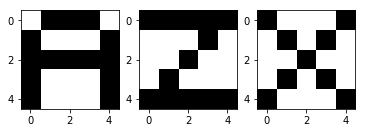

In [4]:
patterns = np.array([to_pattern(A), to_pattern(Z), to_pattern(X)])
display(patterns)

Training = set weights

In [5]:
def train(patterns):
    from numpy import zeros, outer, diag_indices 
    r,c = patterns.shape
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p)
    W[diag_indices(c)] = 0
    return W/r

In [6]:
w=train(patterns)
#print w

Calculate energy of given pattern.

In [7]:
e=[]
def energy(W,patterns):
    e0=e1=e2=0
    for i, j in np.ndindex((25,25)):
        e0+=-0.5*patterns[0][i]*patterns[0][j]*W[i][j]
        e1+=-0.5*patterns[1][i]*patterns[1][j]*W[i][j]
        e2+=-0.5*patterns[2][i]*patterns[2][j]*W[i][j]
        #print e0
    e.append([e0,e1,e2])
    return e


Set number of steps = number of updates of the patterns.

In [8]:
from numpy import vectorize, dot
def recall(W, patterns, steps=60):
    for step in xrange(steps):        
        print "Step: ",step
        for p in patterns:
            rnd=np.random.randint(25)
            s=dot(p,W[rnd])
            #if((step%10)==0):
            print "chosen pixel: ",rnd, ", node sum: ",s
            if s>0:                                            #all thresholds set to zero
                p[rnd]=1
            else:
                p[rnd]=-1 
        #if((step%10)==0):
        display(patterns)
        energy(W,patterns)
    return patterns

Set disortion parameter "pr" = probability that pixel remains unchanged.

In [9]:
pr=0.8

distA=np.random.choice(2, 25, p=[pr,1-pr])
print distA
distZ=np.random.choice(2, 25, p=[pr,1-pr])
print distZ
distX=np.random.choice(2, 25, p=[pr,1-pr])
print distX

dists= np.array([distA,distZ,distX])

[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0]
[0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0]


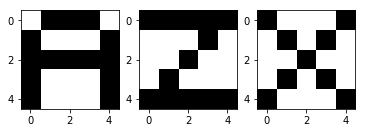

In [10]:
display(patterns)
#print dist_patterns[0]

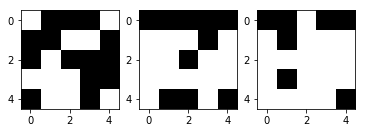

In [11]:
dist_patterns = patterns + 2*dists*(-np.abs(patterns)/patterns)

display(dist_patterns)

Step:  0
chosen pixel:  23 , node sum:  -5.33333333333
chosen pixel:  9 , node sum:  -8.66666666667
chosen pixel:  10 , node sum:  -8.0


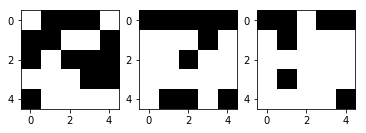

Step:  1
chosen pixel:  4 , node sum:  -7.33333333333
chosen pixel:  7 , node sum:  -6.66666666667
chosen pixel:  1 , node sum:  -4.0


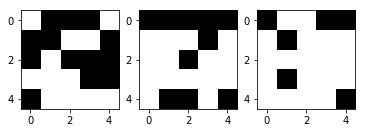

Step:  2
chosen pixel:  10 , node sum:  7.33333333333
chosen pixel:  23 , node sum:  6.0
chosen pixel:  23 , node sum:  0.666666666667


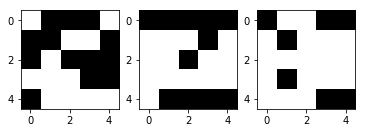

Step:  3
chosen pixel:  11 , node sum:  9.33333333333
chosen pixel:  9 , node sum:  -9.33333333333
chosen pixel:  24 , node sum:  3.33333333333


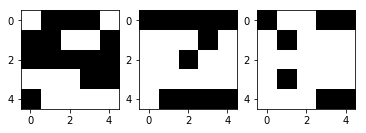

Step:  4
chosen pixel:  6 , node sum:  -5.33333333333
chosen pixel:  12 , node sum:  6.0
chosen pixel:  13 , node sum:  -9.33333333333


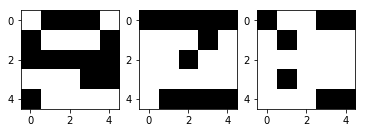

Step:  5
chosen pixel:  14 , node sum:  10.0
chosen pixel:  0 , node sum:  9.33333333333
chosen pixel:  24 , node sum:  3.33333333333


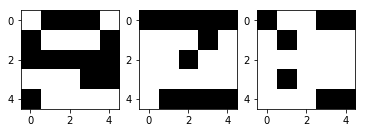

Step:  6
chosen pixel:  16 , node sum:  -10.0
chosen pixel:  18 , node sum:  -2.66666666667
chosen pixel:  9 , node sum:  -9.33333333333


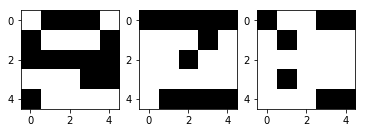

Step:  7
chosen pixel:  2 , node sum:  5.33333333333
chosen pixel:  24 , node sum:  6.0
chosen pixel:  3 , node sum:  -5.33333333333


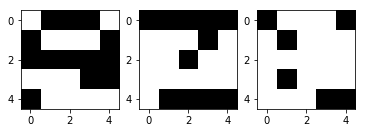

Step:  8
chosen pixel:  12 , node sum:  0.666666666667
chosen pixel:  21 , node sum:  6.0
chosen pixel:  24 , node sum:  2.66666666667


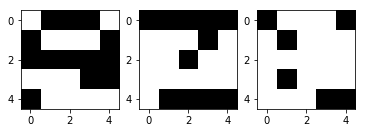

Step:  9
chosen pixel:  2 , node sum:  5.33333333333
chosen pixel:  11 , node sum:  -9.33333333333
chosen pixel:  5 , node sum:  -10.0


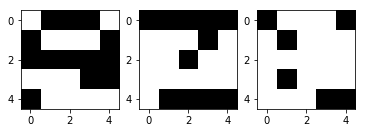

Step:  10
chosen pixel:  7 , node sum:  -0.666666666667
chosen pixel:  19 , node sum:  -9.33333333333
chosen pixel:  1 , node sum:  -5.33333333333


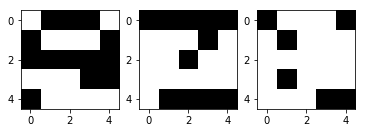

Step:  11
chosen pixel:  7 , node sum:  -0.666666666667
chosen pixel:  2 , node sum:  2.66666666667
chosen pixel:  15 , node sum:  -10.0


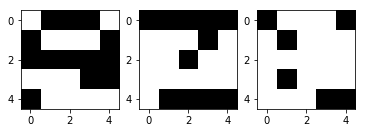

Step:  12
chosen pixel:  1 , node sum:  5.33333333333
chosen pixel:  21 , node sum:  6.0
chosen pixel:  20 , node sum:  4.66666666667


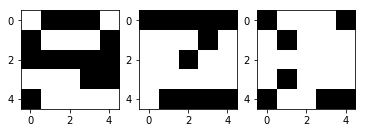

Step:  13
chosen pixel:  21 , node sum:  -5.33333333333
chosen pixel:  16 , node sum:  11.3333333333
chosen pixel:  8 , node sum:  12.6666666667


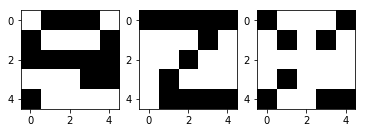

Step:  14
chosen pixel:  5 , node sum:  10.0
chosen pixel:  10 , node sum:  -11.3333333333
chosen pixel:  20 , node sum:  5.33333333333


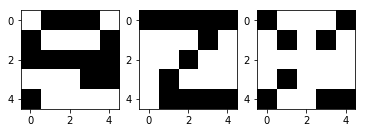

Step:  15
chosen pixel:  0 , node sum:  -10.0
chosen pixel:  15 , node sum:  -11.3333333333
chosen pixel:  22 , node sum:  2.0


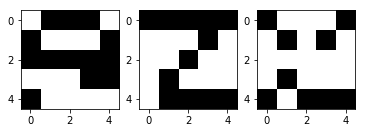

Step:  16
chosen pixel:  22 , node sum:  -5.33333333333
chosen pixel:  2 , node sum:  2.0
chosen pixel:  8 , node sum:  13.3333333333


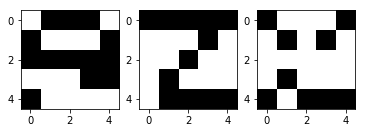

Step:  17
chosen pixel:  5 , node sum:  10.0
chosen pixel:  4 , node sum:  11.3333333333
chosen pixel:  22 , node sum:  2.0


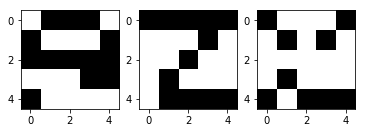

Step:  18
chosen pixel:  1 , node sum:  5.33333333333
chosen pixel:  23 , node sum:  6.66666666667
chosen pixel:  16 , node sum:  13.3333333333


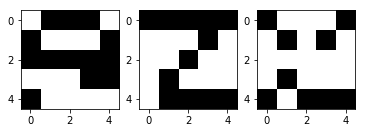

Step:  19
chosen pixel:  5 , node sum:  10.0
chosen pixel:  20 , node sum:  8.66666666667
chosen pixel:  20 , node sum:  4.66666666667


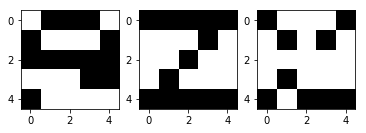

Step:  20
chosen pixel:  10 , node sum:  10.0
chosen pixel:  3 , node sum:  2.66666666667
chosen pixel:  7 , node sum:  -4.66666666667


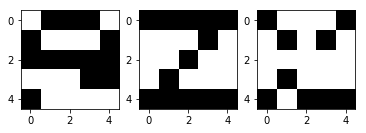

Step:  21
chosen pixel:  16 , node sum:  -10.0
chosen pixel:  21 , node sum:  6.0
chosen pixel:  18 , node sum:  6.66666666667


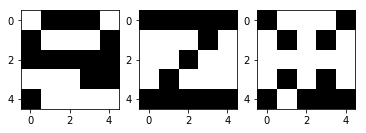

Step:  22
chosen pixel:  14 , node sum:  10.0
chosen pixel:  2 , node sum:  2.66666666667
chosen pixel:  19 , node sum:  -14.0


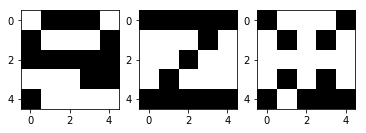

Step:  23
chosen pixel:  9 , node sum:  10.0
chosen pixel:  4 , node sum:  12.0
chosen pixel:  16 , node sum:  14.0


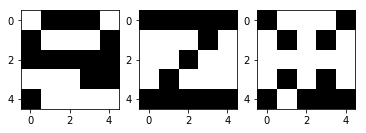

Step:  24
chosen pixel:  11 , node sum:  10.0
chosen pixel:  8 , node sum:  12.0
chosen pixel:  6 , node sum:  6.66666666667


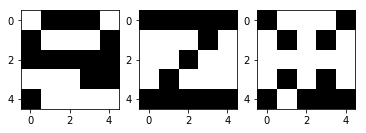

Step:  25
chosen pixel:  18 , node sum:  -7.33333333333
chosen pixel:  1 , node sum:  2.66666666667
chosen pixel:  19 , node sum:  -14.0


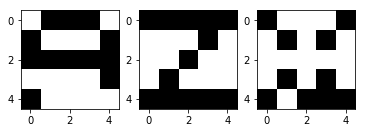

Step:  26
chosen pixel:  15 , node sum:  12.6666666667
chosen pixel:  12 , node sum:  8.66666666667
chosen pixel:  20 , node sum:  4.0


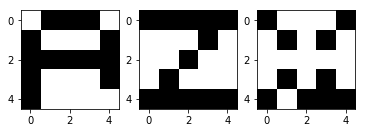

Step:  27
chosen pixel:  12 , node sum:  0.666666666667
chosen pixel:  19 , node sum:  -12.0
chosen pixel:  13 , node sum:  -14.0


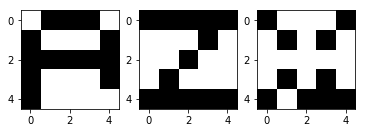

Step:  28
chosen pixel:  23 , node sum:  -5.33333333333
chosen pixel:  9 , node sum:  -12.0
chosen pixel:  11 , node sum:  -14.0


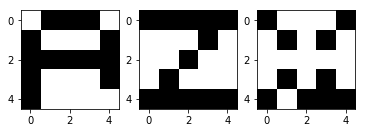

Step:  29
chosen pixel:  23 , node sum:  -5.33333333333
chosen pixel:  6 , node sum:  -2.66666666667
chosen pixel:  1 , node sum:  -6.66666666667


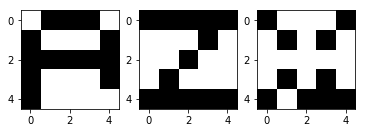

Step:  30
chosen pixel:  5 , node sum:  12.6666666667
chosen pixel:  19 , node sum:  -12.0
chosen pixel:  17 , node sum:  -4.0


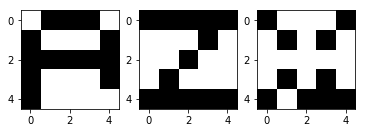

Step:  31
chosen pixel:  22 , node sum:  -5.33333333333
chosen pixel:  12 , node sum:  8.66666666667
chosen pixel:  12 , node sum:  6.0


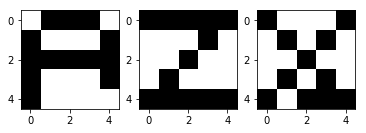

Step:  32
chosen pixel:  0 , node sum:  -12.6666666667
chosen pixel:  9 , node sum:  -12.0
chosen pixel:  15 , node sum:  -14.6666666667


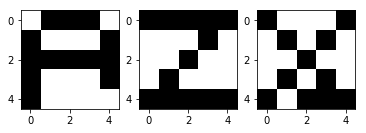

Step:  33
chosen pixel:  14 , node sum:  12.6666666667
chosen pixel:  7 , node sum:  -8.66666666667
chosen pixel:  8 , node sum:  14.6666666667


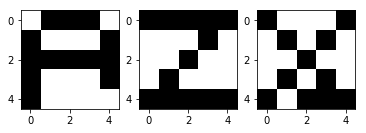

Step:  34
chosen pixel:  20 , node sum:  0.666666666667
chosen pixel:  7 , node sum:  -8.66666666667
chosen pixel:  23 , node sum:  0.666666666667


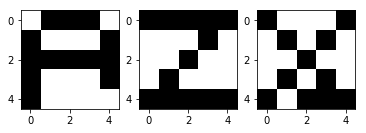

Step:  35
chosen pixel:  6 , node sum:  -8.0
chosen pixel:  8 , node sum:  12.0
chosen pixel:  0 , node sum:  14.6666666667


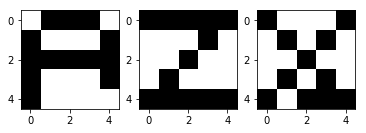

Step:  36
chosen pixel:  6 , node sum:  -8.0
chosen pixel:  6 , node sum:  -2.66666666667
chosen pixel:  14 , node sum:  -14.6666666667


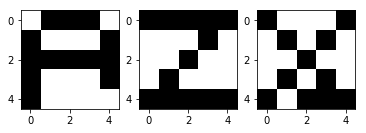

Step:  37
chosen pixel:  15 , node sum:  12.6666666667
chosen pixel:  3 , node sum:  2.66666666667
chosen pixel:  7 , node sum:  -6.0


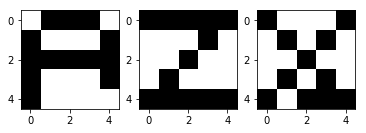

Step:  38
chosen pixel:  2 , node sum:  8.0
chosen pixel:  16 , node sum:  12.0
chosen pixel:  14 , node sum:  -14.6666666667


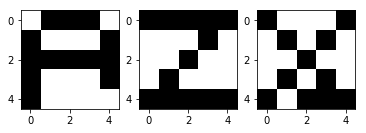

Step:  39
chosen pixel:  14 , node sum:  12.6666666667
chosen pixel:  23 , node sum:  6.0
chosen pixel:  2 , node sum:  -6.0


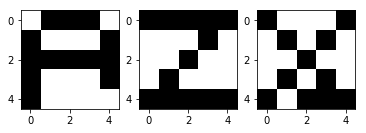

Step:  40
chosen pixel:  21 , node sum:  -5.33333333333
chosen pixel:  4 , node sum:  12.0
chosen pixel:  6 , node sum:  6.0


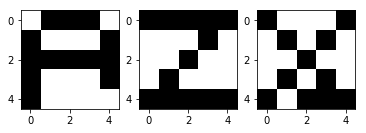

Step:  41
chosen pixel:  15 , node sum:  12.6666666667
chosen pixel:  6 , node sum:  -2.66666666667
chosen pixel:  9 , node sum:  -14.6666666667


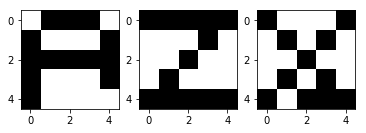

Step:  42
chosen pixel:  1 , node sum:  8.0
chosen pixel:  14 , node sum:  -12.0
chosen pixel:  14 , node sum:  -14.6666666667


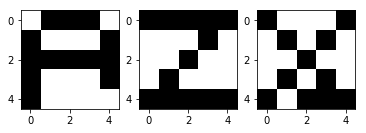

Step:  43
chosen pixel:  22 , node sum:  -5.33333333333
chosen pixel:  14 , node sum:  -12.0
chosen pixel:  9 , node sum:  -14.6666666667


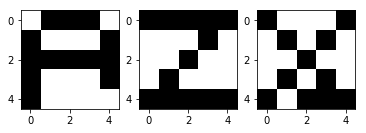

Step:  44
chosen pixel:  1 , node sum:  8.0
chosen pixel:  3 , node sum:  2.66666666667
chosen pixel:  12 , node sum:  6.0


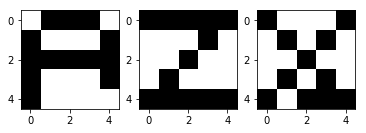

Step:  45
chosen pixel:  12 , node sum:  0.666666666667
chosen pixel:  12 , node sum:  8.66666666667
chosen pixel:  23 , node sum:  0.666666666667


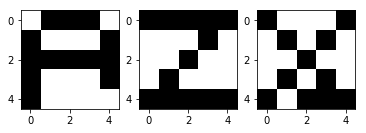

Step:  46
chosen pixel:  0 , node sum:  -12.6666666667
chosen pixel:  13 , node sum:  -12.0
chosen pixel:  13 , node sum:  -14.6666666667


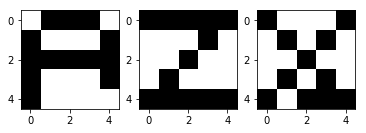

Step:  47
chosen pixel:  19 , node sum:  12.6666666667
chosen pixel:  6 , node sum:  -2.66666666667
chosen pixel:  5 , node sum:  -14.6666666667


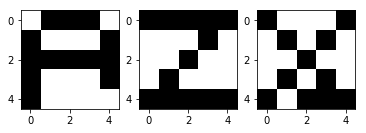

Step:  48
chosen pixel:  13 , node sum:  12.6666666667
chosen pixel:  6 , node sum:  -2.66666666667
chosen pixel:  3 , node sum:  -6.0


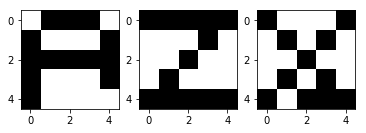

Step:  49
chosen pixel:  24 , node sum:  2.66666666667
chosen pixel:  8 , node sum:  12.0
chosen pixel:  18 , node sum:  6.0


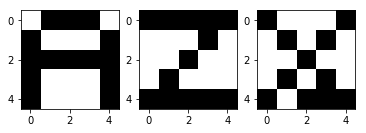

Step:  50
chosen pixel:  18 , node sum:  -8.66666666667
chosen pixel:  18 , node sum:  -2.66666666667
chosen pixel:  17 , node sum:  -6.0


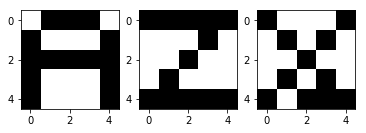

Step:  51
chosen pixel:  20 , node sum:  2.66666666667
chosen pixel:  12 , node sum:  8.66666666667
chosen pixel:  11 , node sum:  -14.6666666667


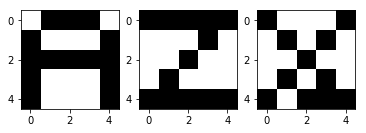

Step:  52
chosen pixel:  21 , node sum:  -6.0
chosen pixel:  20 , node sum:  8.66666666667
chosen pixel:  8 , node sum:  14.6666666667


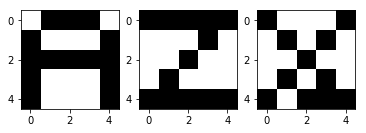

Step:  53
chosen pixel:  19 , node sum:  12.0
chosen pixel:  0 , node sum:  12.0
chosen pixel:  17 , node sum:  -6.0


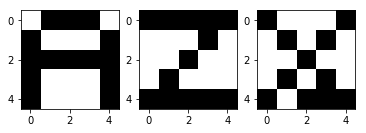

Step:  54
chosen pixel:  23 , node sum:  -6.0
chosen pixel:  13 , node sum:  -12.0
chosen pixel:  18 , node sum:  6.0


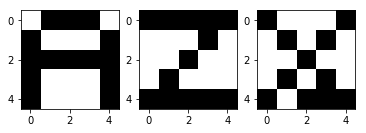

Step:  55
chosen pixel:  7 , node sum:  -2.66666666667
chosen pixel:  17 , node sum:  -8.66666666667
chosen pixel:  7 , node sum:  -6.0


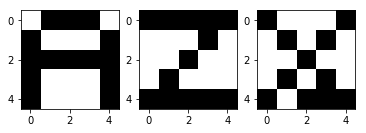

Step:  56
chosen pixel:  21 , node sum:  -6.0
chosen pixel:  24 , node sum:  8.66666666667
chosen pixel:  17 , node sum:  -6.0


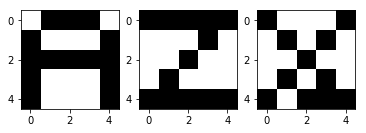

Step:  57
chosen pixel:  7 , node sum:  -2.66666666667
chosen pixel:  19 , node sum:  -12.0
chosen pixel:  14 , node sum:  -14.6666666667


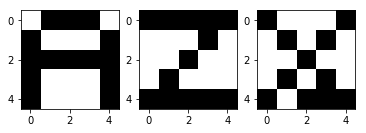

Step:  58
chosen pixel:  1 , node sum:  8.66666666667
chosen pixel:  2 , node sum:  2.66666666667
chosen pixel:  2 , node sum:  -6.0


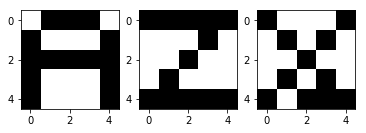

Step:  59
chosen pixel:  18 , node sum:  -8.66666666667
chosen pixel:  12 , node sum:  8.66666666667
chosen pixel:  19 , node sum:  -14.6666666667


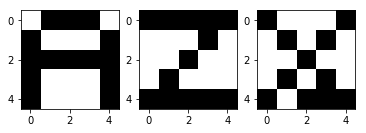

In [12]:
rec_patterns=recall(w,dist_patterns)

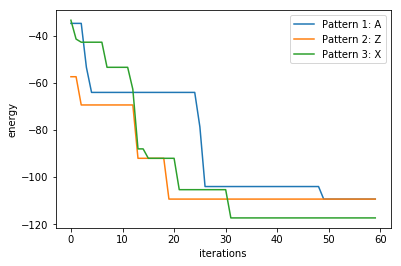

In [13]:
plt.plot(np.asarray(e)[:,0],label='Pattern 1: A')
plt.plot(np.asarray(e)[:,1],label='Pattern 2: Z')
plt.plot(np.asarray(e)[:,2],label='Pattern 3: X')
plt.xlabel("iterations")
plt.ylabel("energy")
plt.legend();